In [44]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [45]:
def handle_non_numerical_data(data):
    "Converting all non-numerical data to numerical"
    #Store all of the columns into variable
    columns=data.columns.values
    for column in columns:
        text_digit_vals={}
        def convert_to_int(val):
            return text_digit_vals[val]
        if(data[column].dtype!=np.int64 and data[column].dtype!=np.float64):
            #dtype is used to check the data type of the column
            column_contents=data[column].values.tolist()
            unique_elements=set(column_contents)
            x=0
            for unique in unique_elements:
                if(unique not in text_digit_vals):
                    text_digit_vals[unique]=x
                    x+=1
            data[column]=list(map(convert_to_int,data[column]))
    return data

In [46]:
train_data=pd.read_csv("train.csv")
train_data=train_data.drop("Id",1)
train_data=handle_non_numerical_data(train_data)
#Normalizing the features
#train_data=(train_data-train_data.mean())/train_data.std()
m=train_data.shape[0]
n=train_data.shape[1]
X_train=train_data.iloc[:,0:n-1]    
ones=np.ones([X_train.shape[0],1])
X_train=np.concatenate((ones,X_train),axis=1)
X_train=np.array(X_train)
Y_train=train_data.iloc[:,n-1:n].values
Y_train=np.array(Y_train).flatten()
split_1=int(0.6*len(X_train))
split_2=int(0.8*len(X_train))
X=X_train[:split_1]
X_dev=X_train[split_1:split_2]
X_test=X_train[split_2:]
Y=Y_train[:split_1]
Y_dev=Y_train[split_1:split_2]
Y_test=Y_train[split_2:]

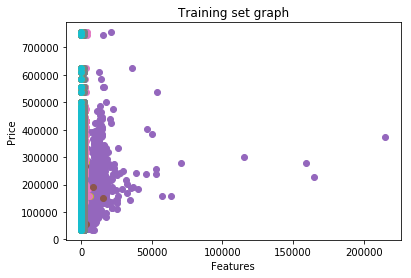

In [49]:
plt.plot(np.nan_to_num(X_train),Y_train,'o')
plt.title('Training set graph')
plt.xlabel('Features')
plt.ylabel('Price')
plt.show()

In [52]:
from sklearn.ensemble import GradientBoostingRegressor
model=GradientBoostingRegressor()
model=model.fit(np.nan_to_num(X_train),Y_train)
print(model.score(np.nan_to_num(X),Y))
print(model.score(np.nan_to_num(X_dev),Y_dev))
print(model.score(np.nan_to_num(X_test),Y_test))

0.9645008755552448
0.9641493344336005
0.9618284369808913


In [53]:
test_data=pd.read_csv("test.csv")
test_data=test_data.drop("Id",1)
test_data=handle_non_numerical_data(test_data)
X_test=test_data.iloc[:,0:n-1]
ones=np.ones([X_test.shape[0],1])
X_test=np.concatenate((ones,X_test),axis=1)
X_test=np.array(X_test)
predicted_prices=model.predict(np.nan_to_num(X_test))
print(model.predict(np.nan_to_num(X_test)))

[107734.03365156 152565.24712797 163563.82676844 ... 168255.51779259
 108715.82035738 230868.8586708 ]


<function matplotlib.pyplot.show(*args, **kw)>

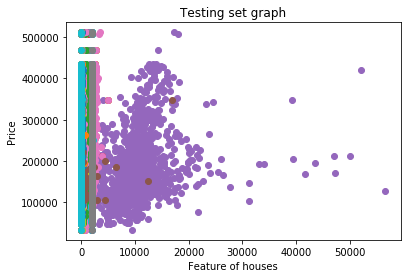

In [55]:
plt.figure(1)
plt.plot(np.nan_to_num(X_test),predicted_prices,'o')
plt.title('Testing set graph')
plt.xlabel('Feature of houses')
plt.ylabel('Price')
plt.show